In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler


df = pd.read_csv(r'C:\Users\umut3\PycharmProjects\mlSec7\Position_Salaries.csv')

print(df)

            Position  Level   Salary
0   Business Analyst      1    45000
1  Junior Consultant      2    50000
2  Senior Consultant      3    60000
3            Manager      4    80000
4    Country Manager      5   110000
5     Region Manager      6   150000
6            Partner      7   200000
7     Senior Partner      8   300000
8            C-level      9   500000
9                CEO     10  1000000


In [2]:
X = df.iloc[:, 1:-1].values
y = df.iloc[:, 2:].values

y = y.reshape(len(y), 1)

print(X)
print("-----------------------------")
print(y)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
-----------------------------
[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


In [3]:
# Feature Scaling
sc_X = StandardScaler()
sc_y = StandardScaler()
X_sc = sc_X.fit_transform(X)
y_sc = sc_y.fit_transform(y)

print(X_sc)
print("-----------------------------")
print(y_sc)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]
-----------------------------
[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


In [4]:
# Training the SVR model
regressor = SVR(kernel="rbf")
# Used to change a 2-dimensional array or a multi-dimensional array into a 1-dimensional array
regressor.fit(X_sc, y_sc.ravel())

SVR()

In [5]:
# Predicting a new result
sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])).reshape(-1, 1))


array([[170370.0204065]])

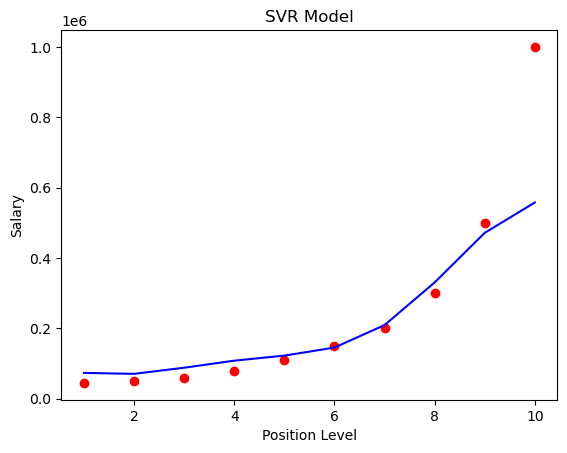

In [6]:
# Visualising the SVR result
plt.scatter(sc_X.inverse_transform(X_sc), sc_y.inverse_transform(y_sc), c='r')
plt.plot(sc_X.inverse_transform(X_sc), sc_y.inverse_transform(regressor.predict(X_sc).reshape(-1, 1)), c='b')
plt.title("SVR Model")
plt.xlabel("Position Level")
plt.ylabel("Salary")
plt.show()

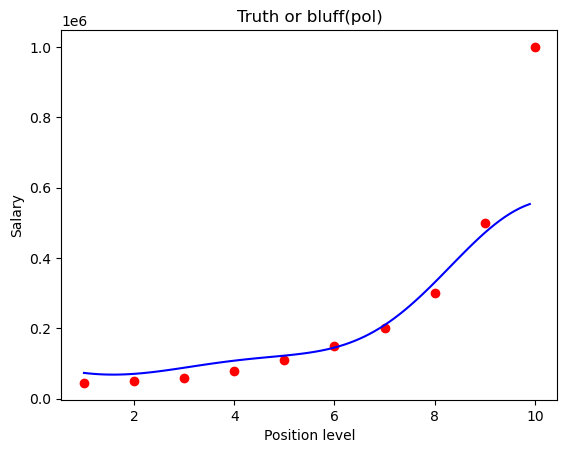

In [7]:
# Visualising the SVR result(Smooth curve)
X_grid = np.arange(min(sc_X.inverse_transform(X_sc)), max(sc_X.inverse_transform(X_sc)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(sc_X.inverse_transform(X_sc), sc_y.inverse_transform(y_sc), color="red")
plt.plot(X_grid, sc_y.inverse_transform(regressor.predict(sc_X.transform(X_grid)).reshape(-1, 1)), color="blue")
plt.title("Truth or bluff(pol)")
plt.xlabel("Position level")
plt.ylabel("Salary")
plt.show()